<a href="https://colab.research.google.com/github/ridwanulhoquejr/ML-Model/blob/main/NLP_Preprocessing_with_ML_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install Unidecode

     |████████████████████████████████| 235 kB 11.9 MB/s 


In [2]:
import pandas as pd
import numpy as np

import nltk
import re
from nltk.corpus import stopwords
import unidecode
import string
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize 

%matplotlib inline

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/hate_speech.csv')

In [4]:
df.shape

(88455, 3)

In [5]:
df.head()

,id,label,tweet
0,1,hate,@user #cnn calls #michigan middle school 'buil...
1,2,hate,no comment! in #australia #opkillingbay #se...
2,3,hate,retweet if you agree!
3,4,hate,@user @user lumpy says i am a . prove it lumpy.
4,5,hate,it's unbelievable that in the 21st century we'...


In [65]:
df['label'].value_counts()

hate       46436
Nonhate    42019
Name: label, dtype: int64

 - Our Dataset is fair enough in terms of `Balance` as our dependent variables label ratio close to 50-50.

In [9]:
processed_df = df.copy()

In [10]:
def clean_text(df):
    all_tweets = list()
    lines = processed_df["tweet"].values.tolist()
    for text in lines:
        text = text.lower()
        
        pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        text = pattern.sub('', text)
        
        emoji = re.compile("["
                           u"\U0001F600-\U0001FFFF"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
        text = emoji.sub(r'', text)
        
        text = re.sub(r"i'm", "i am", text)
        text = re.sub(r"he's", "he is", text)
        text = re.sub(r"she's", "she is", text)
        text = re.sub(r"that's", "that is", text)        
        text = re.sub(r"what's", "what is", text)
        text = re.sub(r"where's", "where is", text) 
        text = re.sub(r"\'ll", " will", text)  
        text = re.sub(r"\'ve", " have", text)  
        text = re.sub(r"\'re", " are", text)
        text = re.sub(r"\'d", " would", text)
        text = re.sub(r"\'ve", " have", text)
        text = re.sub(r"won't", "will not", text)
        text = re.sub(r"don't", "do not", text)
        text = re.sub(r"did't", "did not", text)
        text = re.sub(r"can't", "can not", text)
        text = re.sub(r"it's", "it is", text)
        text = re.sub(r"couldn't", "could not", text)
        text = re.sub(r"have't", "have not", text)
        
        text = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)
        tokens = word_tokenize(text)
        table = str.maketrans('', '', string.punctuation) # it returns a unicode
        stripped = [w.translate(table) for w in tokens] 
        words = [word for word in stripped if word.isalpha()] # considered only Alphabets 
        stop_words = set(stopwords.words("english"))
        stop_words.discard("not")
        words = [w for w in words if not w in stop_words] # removing stop words
        words = ' '.join(words)
        all_tweets.append(words)
    return all_tweets

all_tweets = clean_text(processed_df)

In [11]:
all_tweets;

In [12]:
pd_sers = pd.Series(all_tweets)

In [14]:
processed_df['Cleaned_Tweet'] = pd_sers

In [15]:
# Converting our labels into Numeric numbers i.e: 0=hate, 1=Nonhate
# Here, we use map to do this, map takes an iterable and a function; 

processed_df['target'] = processed_df['label'].map({'hate': 1, 'Nonhate': 0})

## Raw Data Vs Processed Data

In [61]:
# Raw text sample
df['tweet'].iloc[50]

'@user #trump used #hate,  and #putin to win the white house #trump presses attack on khan family and g.o.p. leaders '

In [62]:
# Processed text sample
processed_df['Cleaned_Tweet'].iloc[50]

'user trump used hate putin win white house trump press attack khan family gop leader'

In [16]:
processed_df

,id,label,tweet,Cleaned_Tweet,target
0,1,hate,@user #cnn calls #michigan middle school 'buil...,user cnn calls michigan middle school build wa...,1
1,2,hate,no comment! in #australia #opkillingbay #se...,comment australia opkillingbay seashepherd hel...,1
2,3,hate,retweet if you agree!,retweet agree,1
3,4,hate,@user @user lumpy says i am a . prove it lumpy.,user user lumpy says prove lumpy,1
4,5,hate,it's unbelievable that in the 21st century we'...,unbelievable century would need something like...,1
...,...,...,...,...,...
88450,88451,Nonhate,off fishing tomorrow @user carnt wait first ti...,fishing tomorrow user carnt wait first time years,0
88451,88452,Nonhate,ate @user isz that youuu?Ã°ÂŸÂ˜ÂÃ°ÂŸÂ˜ÂÃ°ÂŸÂ...,ate user isz,0
88452,88453,Nonhate,to see nina turner on the airwaves trying to...,see nina turner airwaves trying wrap mantle ge...,0
88453,88454,Nonhate,listening to sad songs on a monday morning otw...,listening sad songs monday morning otw work sad,0


In [18]:
#Lemmitization

lemmatizer = WordNetLemmatizer()
processed_df['Cleaned_Tweet'] = processed_df['Cleaned_Tweet'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [21]:
X = processed_df['Cleaned_Tweet']
Y = processed_df['target'].values

In [22]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
X = tfidf_v.fit_transform(X).toarray()

In [23]:
tfidf_v.get_feature_names()[:-10];

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=47)

In [27]:
# All of our models in a dictionary

models = {"Multinoimal NB": MultinomialNB(),
          "Linear SVC": LinearSVC(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
   
    np.random.seed(47)
    model_scores = {}

    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [28]:
models_scores = fit_and_score(models, x_train, x_test, y_train, y_test)

In [44]:
model_scores_df = pd.DataFrame([models_scores])

In [45]:
model_scores_df

,Multinoimal NB,Linear SVC,Random Forest
0,0.891884,0.933644,0.941078



##Models Comparison 






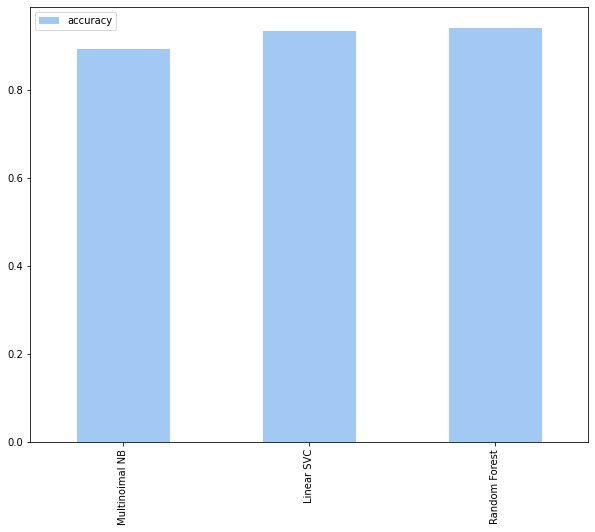

In [64]:
model_compare = pd.DataFrame(models_scores, index=['accuracy'])
model_compare.T.plot(kind="bar", 
                     figsize=(10,8));